Importing libraries

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [ ]:
!apt install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1 [645 kB]
Fetched 645 kB in 0s (2,634 kB/s)
Selecting previously unselected package tesseract-ocr-ara.
(Reading database ... 123116 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ara_1%3a4.00~git30-7274cfa-1_all.deb ...
Unpacking tesseract-ocr-ara (1:4.00~git30-7274cfa-1) ...
Setting up tesseract-ocr-ara (1:4.00~git30-7274cfa-1) ...


In [ ]:
import pytesseract

In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

Image loading

In [ ]:
file=r'Mon projet.png'
img = cv2.imread(file,0)

In [ ]:
img.shape

(1487, 1080)

Thresholding the image

In [ ]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

In [ ]:
img_bin = 255-img_bin

In [ ]:
cv2.imwrite('cv_inverted.png',img_bin)

True

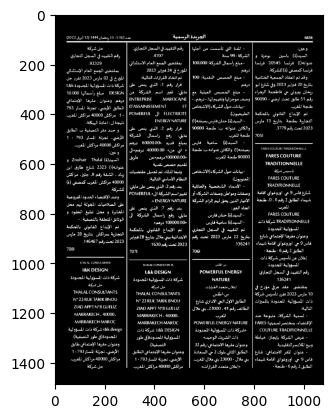

In [ ]:
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

Defining a Kernel

In [ ]:
kernel_len = np.array(img).shape[1]//100

In [ ]:
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

In [ ]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

Vertical Detection

In [ ]:
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)

In [ ]:
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

In [ ]:
type(vertical_lines)

numpy.ndarray

In [ ]:
cv2.imwrite("vertical.jpg",vertical_lines)

True

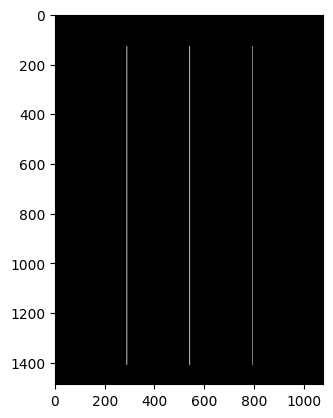

In [ ]:
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

Horizontal lines Detection

In [ ]:
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

In [ ]:
contours, _ = cv2.findContours(horizontal_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Filtering only the horizontal lines of the table after ignoring the dashes

In [ ]:
filtered_lines = []

In [ ]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > img.shape[1] / 10 and h > 1 :  # Adjust the criteria as needed
        filtered_lines.append(contour)

In [ ]:
output = np.zeros_like(img, dtype=np.uint8)
output = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, filtered_lines, -1, (255, 255, 255), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
type(output)

numpy.ndarray

In [ ]:
cv2.imwrite("horizontal.jpg", output)

True

In [ ]:
output_gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

<function matplotlib.pyplot.show(close=None, block=None)>

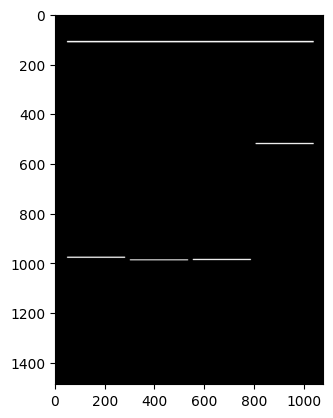

In [ ]:
plotting=plt.imshow(output_gray, cmap='gray')
plt.show

Verifying that the vertical_lines image as well as the horizontal_lines image have the same shape

In [ ]:
vertical_lines.shape

(1487, 1080)

In [ ]:
output_gray.shape

(1487, 1080)

Combining the vertical_lines and the horizontal_lines

In [ ]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, output_gray, 0.5, 0.0)

In [ ]:
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_vh = cv2.bitwise_not(img_vh)
cv2.imwrite("img_vh.jpg", img_vh)

True

<function matplotlib.pyplot.show(close=None, block=None)>

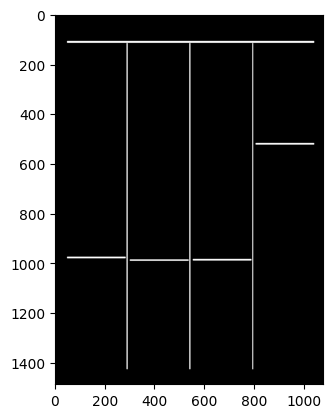

In [ ]:
plotting=plt.imshow(img_vh, cmap='gray')
plt.show

Inverting the combined image

In [ ]:
img_vh = cv2.bitwise_not(img_vh)
cv2.imwrite("img_vh.jpg", img_vh)

True

<function matplotlib.pyplot.show(close=None, block=None)>

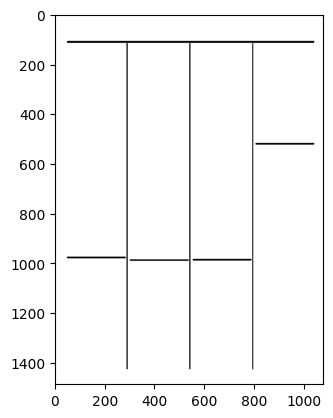

In [ ]:
plotting=plt.imshow(img_vh, cmap='gray')
plt.show

Removing the wholes in the table

In [ ]:
img_vh.shape

(1487, 1080)

In [ ]:
import shutil

In [ ]:
shutil.copy('img_vh.jpg', 'img_vh_copy.jpg')

'img_vh_copy.jpg'

In [ ]:
img_vh_copy = cv2.imread('img_vh_copy.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
num_channels = img_vh_copy.shape[2] if len(img_vh_copy.shape) == 3 else 1

In [ ]:
image_3d = np.expand_dims(img_vh_copy, axis=2) if num_channels < 3 else image

In [ ]:
image_3d.shape

(1487, 1080, 1)

In [ ]:
(hei,wid,_) = image_3d.shape

In [ ]:
blur = cv2.GaussianBlur(image_3d, (3,3), 0)

In [ ]:
c, thresh_1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [ ]:
contours_1, hierarchy_1 = cv2.findContours(thresh_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
box = []
for c in contours_1:
    x_1, y_1, w_1, h_1 = cv2.boundingRect(c)
    box.append([x_1,y_1,w_1,h_1])

In [ ]:
heights=[]
widths=[]
xs=[]
ys=[]
for b in box:
    heights.append(b[3])
    widths.append(b[2])
    xs.append(b[0])
    ys.append(b[1])
min_height = np.min(heights)
min_width = np.min(widths)
min_x = np.min(xs)
min_y = np.min(ys)
max_y = np.max(ys)
max_x = np.max(xs)

In [ ]:
for b in box:
    if b[1] == max_y:
        max_y_height = b[3]

In [ ]:
for b in box:
    if b[0] == max_x:
        max_x_width = b[2]

In [ ]:
horizontal_kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (6,1))
horizontal_mask_1 = cv2.morphologyEx(thresh_1, cv2.MORPH_OPEN, horizontal_kernel_1, iterations=1)
horizontal_mask_1 = cv2.dilate(horizontal_mask_1, horizontal_kernel_1, iterations=9)

In [ ]:
cv2.imwrite("horizontal_mask_1.png", horizontal_mask_1)

True

<function matplotlib.pyplot.show(close=None, block=None)>

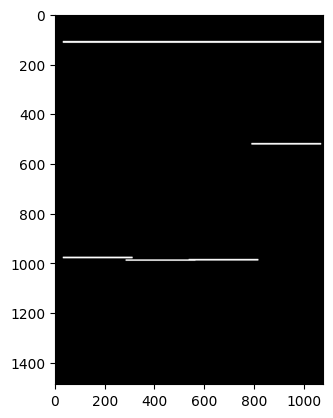

In [ ]:
plotting=plt.imshow(horizontal_mask_1, cmap='gray')
plt.show

In [ ]:
vertical_kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (1,9))
vertical_mask_1 = cv2.morphologyEx(thresh_1, cv2.MORPH_OPEN, vertical_kernel_1, iterations=1)
vertical_mask_1= cv2.dilate(vertical_mask_1, vertical_kernel_1, iterations=9)

<function matplotlib.pyplot.show(close=None, block=None)>

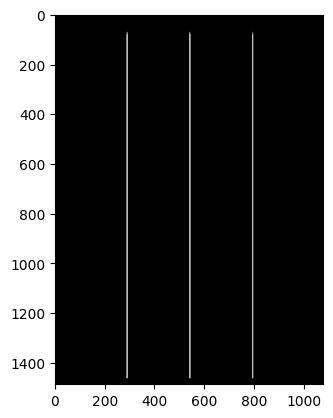

In [ ]:
cv2.imwrite("vertical_mask_1.jpg", vertical_mask_1)
plotting=plt.imshow(vertical_mask_1, cmap='gray')
plt.show

In [ ]:
result = 255-cv2.bitwise_or(vertical_mask_1, horizontal_mask_1)

In [ ]:
cv2.imwrite("result.jpg", result)

True

<function matplotlib.pyplot.show(close=None, block=None)>

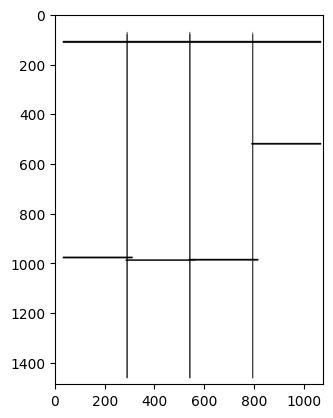

In [ ]:
plotting=plt.imshow(result, cmap='gray')
plt.show

End of the removal

Detecting the contours table

In [ ]:
contours, hierarchy = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Getting the sequence of the countours and sorting them

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
      i = 1
    boundingBoxes = [cv2.boundingRect(e) for e in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)
contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')

In [ ]:
boundingBoxes

((0, 0, 1080, 1487),
 (30, 71, 1040, 1394),
 (544, 116, 248, 868),
 (292, 116, 247, 870))

Cells position retrieving

In [ ]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

In [ ]:
heights

[1487, 1394, 868, 870]

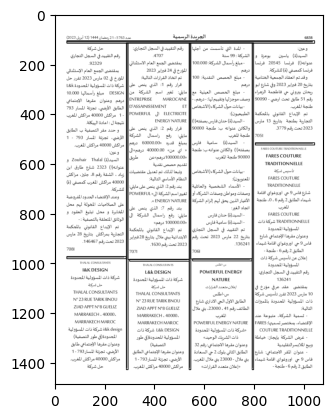

In [ ]:
#Create list box to store all boxes in
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<2000):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
cv2.imwrite("image.png", image)
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
box

[[47, 107, 995, 10],
 [791, 116, 6, 1313],
 [538, 116, 7, 1313],
 [286, 116, 7, 1313],
 [804, 517, 238, 9],
 [47, 974, 238, 9],
 [552, 983, 238, 9],
 [299, 985, 239, 8]]

Detecting the exact location of the cell in the table

In [ ]:
row=[]
column=[]
j=0
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[47, 974, 238, 9], [552, 983, 238, 9], [299, 985, 239, 8]]
[[[47, 107, 995, 10], [791, 116, 6, 1313], [538, 116, 7, 1313], [286, 116, 7, 1313]], [[804, 517, 238, 9]], [[47, 974, 238, 9], [552, 983, 238, 9], [299, 985, 239, 8]]]


calculating the maximum number of cells

In [ ]:
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [ ]:
countcol

3

In [ ]:
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [ ]:
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [ ]:
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = img_vh[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)


                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [ ]:
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")

    0   1   2
0           
1           
2         


In [ ]:
data.to_excel('final_output.xlsx')

IllegalCharacterError: ignored